In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
crashfinal = pd.read_pickle('/content/drive/MyDrive/Main Capstone/crashfinal.plk')

In [ ]:
crashfinal.head()

uid  latitude  ...  v_component_of_wind_10m_above_ground       StreetName
0    1 -1.188850  ...                             -0.933914       Thika Road
1    2 -0.662939  ...                             -0.933914                 
2    3 -0.662939  ...                             -0.933914                 
3    4 -1.288087  ...                             -0.933914  Harambee Avenue
4    5 -1.188850  ...                             -0.933914       Thika Road

[5 rows x 22 columns]

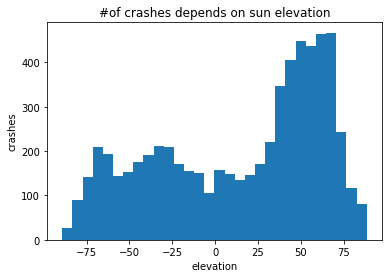

In [ ]:
plt.title('#of crashes depends on sun elevation')
plt.hist(crashfinal.elevation, bins=30);
plt.xlabel('elevation')
plt.ylabel('crashes');

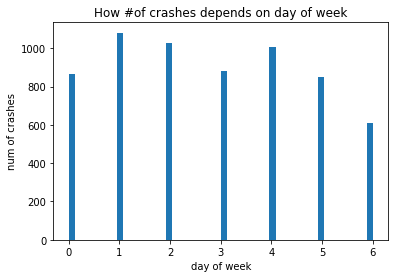

In [ ]:
plt.title('How #of crashes depends on day of week')
plt.hist(crashfinal.day_of_week, bins=50)
plt.xlabel('day of week')
plt.ylabel('num of crashes')
plt.show()

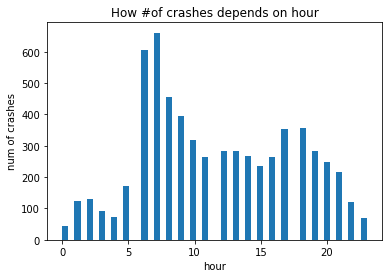

In [ ]:
plt.title('How #of crashes depends on hour')
plt.hist(crashfinal.hour, bins=50)
plt.xlabel('hour')
plt.ylabel('num of crashes')
plt.show()

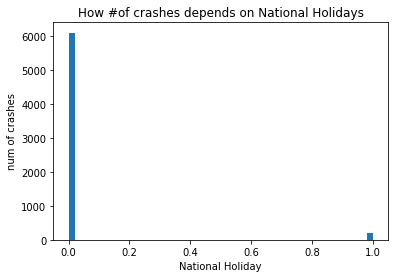

In [ ]:
plt.title('How #of crashes depends on National Holidays')
plt.hist(crashfinal.national_holiday, bins=50)
plt.xlabel('National Holiday')
plt.ylabel('num of crashes')
plt.show()

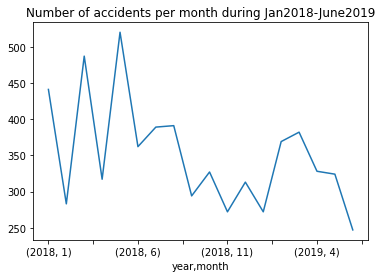

In [ ]:
gp=crashfinal.groupby(['year','month']).size()
gp.plot(title="Number of accidents per month during Jan2018-June2019")
plt.show()

In [ ]:
# In automn and winter there are less crashes

In [ ]:
from geopy.geocoders import Nominatim
import time
from pprint import pprint

In [ ]:
app = Nominatim(user_agent="tutorial")
# get location raw data
location = app.geocode("Nairobi, Kenya").raw
# print raw data
pprint(location)

{'boundingbox': ['-1.444471', '-1.163332', '36.6509378', '37.1038871'],
 'class': 'place',
 'display_name': 'Nairobi, Kenya',
 'icon': 'https://nominatim.openstreetmap.org/ui/mapicons//poi_place_city.p.20.png',
 'importance': 0.845026759433763,
 'lat': '-1.3031689499999999',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '36.826061224105075',
 'osm_id': 9185096,
 'osm_type': 'relation',
 'place_id': 296866695,
 'type': 'city'}


In [ ]:
!pip install folium

In [ ]:
# Accidents on Nairobi Map

In [ ]:
import folium
world_map = folium.Map(location = [float(location['lat']), float(location['lon'])], zoom_start=16)

incidents = folium.map.FeatureGroup()
# machines = folium.map.FeatureGroup()
# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(crashfinal.latitude, crashfinal.longitude):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.2
        )
    )

world_map.add_child(incidents)
world_map